In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import io
import sys
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

In [ ]:
# A executer sur VSCode

sys.path.append("house-prices-advanced-regression-techniques")
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv') # csv => train.csv
df.head() # to display the first 5 lines of loaded data

In [ ]:
# A executer sur Colab

# Uploaded file => train.csv

from google.colab import files
uploaded = files.upload()

# Automatically get the correct filename, no matter what it's called
filename = next(iter(uploaded))
print(f"Using file: {filename}")

# Read the uploaded CSV file
df = pd.read_csv(io.BytesIO(uploaded[filename]))

Saving train.csv to train.csv
Using file: train.csv


In [ ]:
# SEPARATE EACH DATA TYPE AS TO TREAT THEM DIFFERENTLY

n_unique = df.nunique() # compute nmbr of unique values for each col of df,
# determines if data is binary or categorical
dtypes = df.dtypes # retrieves data type for each col in df

quant_threshold = 10 # threshold after which the data is considered quantitative

# var where is col name will be stocked
quant_var = []
binary_var = []
categorical_var = []


for col in df.columns:
  if dtypes[col] in ['int64', 'float64']:
    if n_unique[col] == 2:
      binary_var.append(col) # if col dt is numbers and has only two possible values

    elif n_unique[col]>quant_threshold:
      quant_var.append(col) # if col dt is numbers but has more than 10
    else:
      categorical_var.append(col)

  elif dtypes[col] in ['object', 'category', 'bool']:
        if n_unique[col] == 2:
            if df[col].dtype == 'object':
                # if the column is an object type but only has two values, convert it to binary
                df[col] = df[col].map({df[col].unique()[0]: 0, df[col].unique()[1]: 1})
            binary_var.append(col)
        else:
            categorical_var.append(col)

df_quant = df[quant_var] # Quantitative variables
df_binary = df[binary_var] # Binary variables
df_categorical = df[categorical_var] # Categorical variables

print("Quantitative variables:", quant_var)
print("Binary variables:", binary_var)
print("Categorical variables:", categorical_var)

# check that all our variables are here
print(len(quant_var) + len(binary_var) + len(categorical_var))


Quantitative variables: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'SalePrice']
Binary variables: ['Street', 'Alley', 'Utilities', 'CentralAir']
Categorical variables: ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'Gara

In [ ]:
# QUANTITATIVE VARIABLES

# Descriptive analysis: mean, sd, Conf interval etc
def descriptive_stats(df_quand):
  stats_summary = df_quant.describe().T #summary for each variable

  for col in df_quant.columns:
    mean = df_quant[col].mean()
    sd = df_quant[col].std()
    n = df_quant[col].count()
    CI = stats.t.interval(0.95, n-1, loc = mean, scale= sd/np.sqrt(n))

    stats_summary.loc[col, "CI_95%_lower"] = CI[0]
    stats_summary.loc[col, "CI_95%_upper"] = CI[1]

  return stats_summary

stats_summary = descriptive_stats(df_quant)
# print(stats_summary)

# Correlation test with house prices

def hypothesis_test(def_quant, price):
  res = {}

  for col in df_quant.columns:
    if col == price:
      continue


    corr, p_value = pearsonr(df_quant[col], df_quant[price])
    res[col] = {"Correlation coeff" : corr, "P-value": p_value}

  return res

print(hypothesis_test(df_quant, "SalePrice"))

# Anova doesn't apply because its requires one quantitative and several categorical variables

{'Id': {'Correlation coeff': np.float64(-0.021916719443431106), 'P-value': np.float64(0.40269379975577285)}, 'MSSubClass': {'Correlation coeff': np.float64(-0.0842841351265952), 'P-value': np.float64(0.0012664716847494487)}, 'LotFrontage': {'Correlation coeff': np.float64(nan), 'P-value': np.float64(nan)}, 'LotArea': {'Correlation coeff': np.float64(0.2638433538714057), 'P-value': np.float64(1.123139154918655e-24)}, 'YearBuilt': {'Correlation coeff': np.float64(0.522897332879497), 'P-value': np.float64(2.990229099013019e-103)}, 'YearRemodAdd': {'Correlation coeff': np.float64(0.5071009671113863), 'P-value': np.float64(3.1649482419171655e-96)}, 'MasVnrArea': {'Correlation coeff': np.float64(nan), 'P-value': np.float64(nan)}, 'BsmtFinSF1': {'Correlation coeff': np.float64(0.38641980624215333), 'P-value': np.float64(3.394109829288488e-53)}, 'BsmtFinSF2': {'Correlation coeff': np.float64(-0.01137812145021514), 'P-value': np.float64(0.6639986508340916)}, 'BsmtUnfSF': {'Correlation coeff': n

In [ ]:
# I did this with chatgpt because i really didn't know how i could rank all these values
def rank_features(df_quant, target_variable):
    stats_summary = descriptive_stats(df_quant)
    hypothesis_results = hypothesis_test(df_quant, target_variable)

    # Convert hypothesis test results to Df for easier manipulation
    hypothesis_df = pd.DataFrame(hypothesis_results).T

    # Combine both descriptive stats and hypothesis test results into one DataFrame
    combined_df = stats_summary.join(hypothesis_df)
    # We will rank by correlation, p-value, and the variance

    # Rank by correlation coefficient (absolute value to consider positive and negative correlations)
    combined_df['abs_corr'] = combined_df['Correlation coeff'].abs()

    # Add a score based on p-value (lower p-value = higher significance)
    combined_df['p_value_rank'] = combined_df['P-value'].rank(ascending=True, method='min')

    # Add a score based on the variance (higher variance = more spread = more informative)
    combined_df['variance'] = combined_df['std'].rank(ascending=False, method='min')

    # Final rank score (each factor is kind of arbirtarily weighted, the more * the more important it is considered)
    combined_df['final_rank'] = combined_df['abs_corr'] * 10 + combined_df['p_value_rank'] * 2 + combined_df['variance'] * 5

    combined_df_sorted = combined_df.sort_values(by='final_rank', ascending=False)

    return combined_df_sorted[['Correlation coeff', 'P-value', 'CI_95%_lower', 'CI_95%_upper', 'variance', 'final_rank']]

# Example usage (assuming df_quant is your quantitative DataFrame and "SalePrice" is the target variable)
ranked_features = rank_features(df_quant, "SalePrice")
print(ranked_features)

               Correlation coeff        P-value   CI_95%_lower   CI_95%_upper  \
MoSold                  0.046432   7.612758e-02       6.183121       6.460714   
TotRmsAbvGrd            0.533723  2.772281e-108       6.434365       6.601251   
3SsnPorch               0.044584   8.858170e-02       1.904520       4.914658   
YearRemodAdd            0.507101   3.164948e-96    1983.805876    1985.925631   
LowQualFinSF           -0.025606   3.282073e-01       3.348348       8.340693   
MSSubClass             -0.084284   1.266472e-03      54.725668      59.068853   
YearBuilt               0.522897  2.990229e-103    1969.717276    1972.818340   
ScreenPorch             0.111447   1.972140e-05      12.198530      17.923388   
EnclosedPorch          -0.128578   8.255770e-07      18.816424      25.091795   
BsmtFinSF2             -0.011378   6.639987e-01      38.267637      54.830993   
OpenPorchSF             0.315856   3.493374e-35      43.258876      50.061672   
WoodDeckSF              0.32

   Street  Utilities  CentralAir
0       0          0           0
1       0          0           0
2       0          0           0
3       0          0           0
4       0          0           0 

CentralAir
0    1365
1      95
Name: count, dtype: int64 

Utilities
0    1459
1       1
Name: count, dtype: int64 

Street
0    1454
1       6
Name: count, dtype: int64


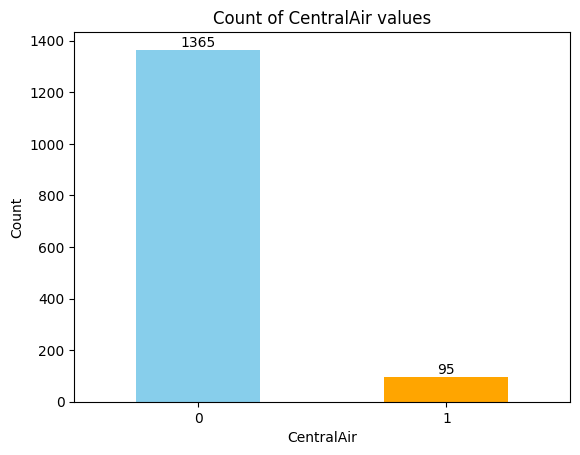

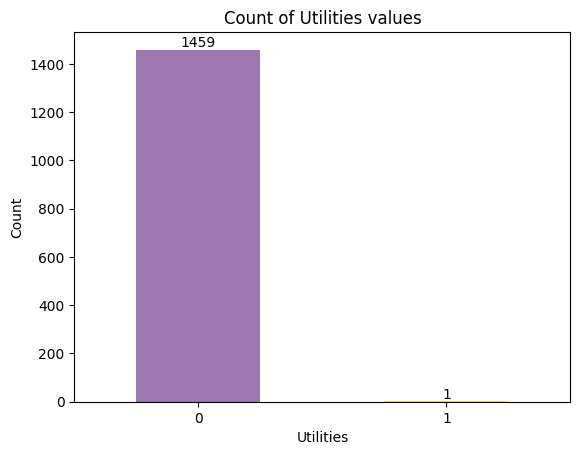

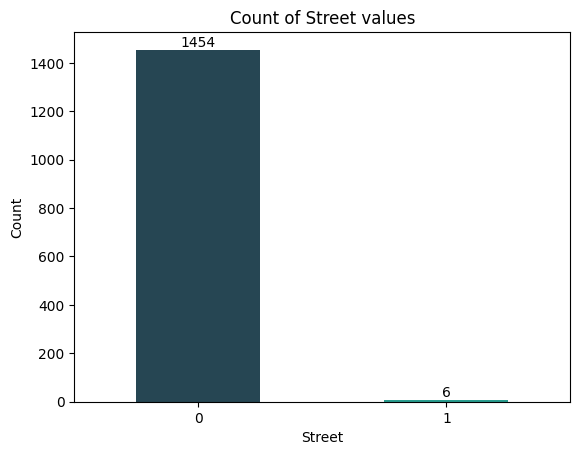

In [ ]:
# BINARY VARIABLES
# Methods to be applied: descriptive stats, 2^k/fractional factorial design

print(df_binary.head(),'\n') # to get a quick overview

CentralAir_count = df_binary['CentralAir'].value_counts()
Utilities_count = df_binary['Utilities'].value_counts()
Street_count = df_binary['Street'].value_counts()

print(CentralAir_count, '\n')
print(Utilities_count, '\n')
print(Street_count)


## Bar plots

# CentralAir
CentralAir_plot = CentralAir_count.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Count of CentralAir values')
plt.xlabel('CentralAir')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Annotate each bar
for i, value in enumerate(CentralAir_count):
    CentralAir_plot.text(i, value, str(value), ha='center', va='bottom', fontsize=10) # CentralAir_plot.text() places the count slightly above the bar so it’s visible. ha='center' ensures the label is centered horizontally on the bar.

plt.show()

# Utilities
Utilities_plot = Utilities_count.plot(kind='bar', color=['#9E77B0', '#FFD166'])
plt.title('Count of Utilities values')
plt.xlabel('Utilities')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Annotate each bar
for i, value in enumerate(Utilities_count):
    Utilities_plot.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

# Street
Street_plot = Street_count.plot(kind='bar', color=['#264653', '#2A9D8F'])
plt.title('Count of Street values')
plt.xlabel('Street')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Annotate each bar
for i, value in enumerate(Street_count):
    Street_plot.text(i, value, str(value), ha='center', va='bottom', fontsize=10) #ax.text() places the count slightly above the bar so it’s visible. ha='center' ensures the label is centered horizontally on the bar.

plt.show()

In [ ]:
#plt.hist(df_categorical["MSZoning"]) # Je vais essayer de faire en sorte de mettre ça dans la for loop et avoir un histogram par value

In [ ]:
# CATEGORICAL VARIABLES
# Methods to be applied: descritive, inference, 2^k/fractional factorial, anova

print(df_categorical.head(), '\n')

for i in df_categorical.columns:
  print(df_categorical[i].value_counts(), '\n')


# Methods to use
# 2^k, anova and descriptive stats

  MSZoning Alley LotShape LandContour LotConfig LandSlope Neighborhood  \
0       RL  none      Reg         Lvl    Inside       Gtl      CollgCr   
1       RL  none      Reg         Lvl       FR2       Gtl      Veenker   
2       RL  none      IR1         Lvl    Inside       Gtl      CollgCr   
3       RL  none      IR1         Lvl    Corner       Gtl      Crawfor   
4       RL  none      IR1         Lvl       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType  ... GarageQual  GarageCond  PavedDrive  \
0       Norm       Norm     1Fam  ...         TA          TA           Y   
1      Feedr       Norm     1Fam  ...         TA          TA           Y   
2       Norm       Norm     1Fam  ...         TA          TA           Y   
3       Norm       Norm     1Fam  ...         TA          TA           Y   
4       Norm       Norm     1Fam  ...         TA          TA           Y   

  PoolArea PoolQC Fence MiscFeature YrSold SaleType SaleCondition  
0        0    NaN   NaN       